# Homework 6A

This is part of Homework 6.  Due by 11:00pm on March 10, 2023

For the complete assignment and submission instructions, see:
http://faculty.washington.edu/rjl/classes/am574w2023/homework6.html

Ideally you will do this part of the homework by modifying this Jupyter notebook `$AM574/homeworks/hw6/hw6A.ipynb` to fill in the solutions, with plots to accompany your results.  If necessary you can scan some handwritten things instead.

The notebook `$AM574/homeworks/hw5/hw5solutions.ipynb` may be helpful, particularly if you had any problems with hw5.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from scipy.optimize import fsolve

## Isothermal p-system

Many of the problems below concern the same nonlinear hyperbolic system 
$q_t + f(q)_x=0$ given by the p-system arising from Lagrangian gas dynamics (2.108)
in the case of isothermal flow (as in Problem 2.8(b) from hw1 and hw5):

$$
\begin{split}
v_t - u_x &= 0,\\
u_t + (a^2/v)_x &=0.
\end{split}
$$

Write out formulas for general values of $a$ but use $a=2$ for the specific examples.

In [3]:
def plot_phase_plane():
    """
    Set up a plot with appropriate limits and labels
    """
    figure(figsize=(5,5))
    plot([0,6],[0,0],'k-',linewidth=0.7)  # v-axis
    axis([0,6,-3,3])
    grid(True)
    xlabel('v = specific volume')
    ylabel('u = velocity');

**Question 1.** 

In hw5, you worked out relations for the Hugoniot loci and integral curves and found solutions consisting of 2 rarefaction waves or 2 shocks (possibly violating the entropy condition).  These can be computed analytically.  The notebook `$AM574/homeworks/hw5/hw5solutions.ipynb` also illustrates how to use [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)
to solve for the intersection point numerically.

Write a function `Rsolver(vl,ul,vr,ur,a)` that takes a left and right state as input and returns `vm,um`, the correct middle state in the vanishing viscosity Riemann solution.  In this case each wave can be either a shock or rarefaction depending on the data provided.

Do this by first defining function `phi_left(v,vl,ul,a)` that returns `u` as a function of `v` that is either along the integral curve or the Hugoniot locust through `(vl,ul)`, depending on whether the state $(vm,um)` should be connected to `(vl,ul)` by a rarefaction wave or shock, respectively.  Similarly define `phi_right(v,vr,ur,a)`.  These functions are analogous to those defined in Section 13.10 for the shallow water equations, and can be defined using the functions `uint1, uint2, uhug1, uhug2` defined in Homework 5.

Then apply `fsolve` to find the intersection of `phi_left` with `phi_right`.  Note that `fsolve` can take an initial guess for the solution and if this is not reasonably close to be correct then the solver may not converge.  So as an initial guess, use the intersection of the appropriate integral curves passing through $q_\ell$ and $q_r$.

Test your function by applying it to:

(a) the case from Homework 5, $q_\ell = (1,-2)$ and $q_r = (1,2)$, where the correct solution has two rarefaction waves

(b) $q_\ell = (1,1)$ and $q_r = (2.5,2)$, where the correct solution has two shock waves

(c) $q_\ell = (0.5, -1)$ and $q_r = (2, 1)$

(d) $q_\ell = (2.5,0)$ and $q_r = (0.2,2)$

In each case print out the state `(vm,um)` and produce a phase plane plot like what is shown below.  The solution to (b) should look like this:

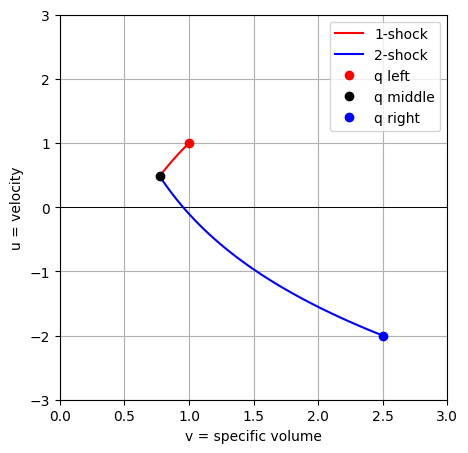

In [4]:
from IPython.display import Image
Image('isothermal3.png', width=500)

Here is a the function I used to make this plot, missing a couple critical `CONDITIONS` for you to think about and fill in, along with providing the function `Rsolver`:

In [5]:
def plot_Rsoln_sample(vl,ul,vr,ur,a):
    
    vm,um = Rsolver(vl,ul,vr,ur,a)
    
    plot_phase_plane()
    
    v = linspace(vl,vm,100)
    if CONDITION1:
        label1 = '1-rarefaction'
    else:
        label1 = '1-shock'
    plot(v, phi_left(v,vl,ul,a),'r-',label=label1)
    
    v = linspace(vr,vm,100)
    if CONDITION2:
        label2 = '2-rarefaction'
    else:
        label2 = '2-shock'
    plot(v, phi_right(v,vr,ur,a),'b-',label=label2)
    
    plot([vl],[ul],'ro',label='q left')
    plot([vm],[um],'ko',label='q middle')
    plot([vr],[ur],'bo',label='q right')
    legend()
    xlim(0,3);

**Question 2.** 

Following Section 13.8.2 and using the integral curves determined in hw5, what are the Riemann invariants for this system?

**Question 3.** 

Compute the structure $\tilde q(x/t)$ of a centered rarefaction wave in the 1-wave family for this system (following Section 13.8.5) connecting two states $q_\ell$ and $q_r$ on the same integral curve.  For what states is this a valid solution?

## Roe solver for the p-system

The next few problems concern the general p-system

$$
q = \begin{bmatrix}v\\u\end{bmatrix}, \qquad f(q) = \begin{bmatrix}-u \\ p(v) \end{bmatrix}
$$

with $p'(v) < 0$ for $v>0$.  

**Question 4.** 

For any given states $q_\ell~,q_r$, let $\Delta u = u_r - u_\ell$ and $\Delta p = p_r - p_\ell$.  Show that the matrix 

$$
\hat A(q_\ell,q_r) = \begin{bmatrix}0&-1\\ (\Delta p/\Delta u) & 0 \end{bmatrix}
$$

satisfies the condition (15.18) and hence can be used to define a "Roe solver" for this system.

**Question 5.** 

Recall that the eigenvalues of the Jacobian $f'(q)$ are $\mp c$ where $c(q) = \sqrt{-p'(v)}$, and the corresponding eigenvector matrix is

$$
R(q) = \begin{bmatrix} 1&1 \\ c&-c \end{bmatrix}
$$

What are the eigenvalues $\hat\lambda$ and eigenvectors $\hat R$ of $\hat A(q_\ell,q_r)$?

**Question 6.** 

Explain why an "entropy fix" is not needed for the p-system.  Do this in terms of the mathematics but also think about why this is true in terms of the physical interpretation of Lagrangian gas dynamics -- why can there never be a transonic rarefaction?

**Question 7.** 

Work out the HLL approximate Riemann solver for the p-system for isothermal flow with $p(v) = a^2/v$.

**Question 8.** 

Again for for the p-system for isothermal flow, implement the HLL solver as a function `Rsolver_HLL(vl,ul,vr,ur,a)` that returns the approximate middle state `(vstar, ustar)`.  As the speeds, use

$$
s^1 = \min(\lambda^1(q_\ell), \lambda^1(q_r))\quad\text{and}\quad
s^2 = \max(\lambda^2(q_\ell), \lambda^2(q_r)).
$$

Also implement the Roe solver as a function `Rsolver_Roe(vl,ul,vr,ur,a)` that returns the approximate middle state `(vhat, uhat)`. Note that your solver should do something reasonable if `vl = vr`.  (See for example the Fortran version `rp1_psystem_roe.f90` used in `hw6B`.

Then write a plotting function `plot_Rsoln_HLL_Roe(vl,ul,vr,ur,a)` that augments the `plot_Rsoln` defined above by *also* plotting the HLL state `(vstar, ustar)` in green and the Roe state `(vhat, uhat)` in magenta.  For example, with the data from Question 1(b), you should see something like this:

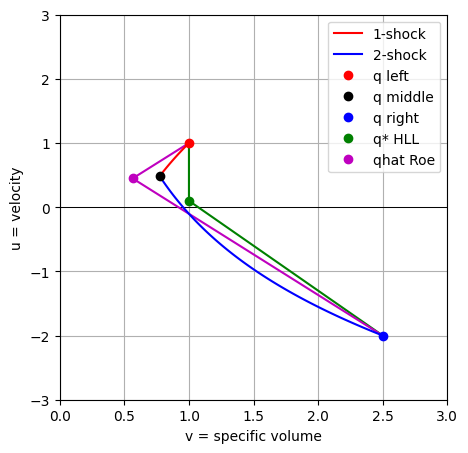

In [6]:
Image('isothermal_HLL_Roe.png', width=400)